In [39]:
import pandas as pd
from pandas import DataFrame

from datetime import datetime

import timeit

import random

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

import scipy as scipy
from scipy import optimize
from scipy.optimize import curve_fit

import seaborn as sns


import folium
from folium.plugins import HeatMap
from folium import plugins


import os

from Bio.PDB import *

# https://stackoverflow.com/questions/39826250/conda-stuck-on-proceed-y-n-when-updating-packages-in-ipython-console
#!conda config --add channels conda-forge
#!conda install nglview -c bioconda
#!jupyter nbextension enable nglview --py --sys-prefix


import nglview as nv

In [40]:
pdb1 = PDBList()
pdb1.retrieve_pdb_file('4XP1')

import os
#print(os.listdir())

parser = MMCIFParser()

structure = parser.get_structure('4xp1','/home/fabio/xp/4xp1.cif')

def cleandir(obj):
    print(", ".join([a for a in dir(obj) if not a.startswith("_")]))
cleandir(structure)

view = nv.show_biopython(structure)
view.clear_representations()
view.add_ball_and_stick()
view

#display(structure)
#print(structure)

Structure exists: '/home/fabio/xp/4xp1.cif' 


/home/fabio/miniconda2/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7477.
  PDBConstructionWarning,
/home/fabio/miniconda2/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 7658.
  PDBConstructionWarning,
/home/fabio/miniconda2/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7659.
  PDBConstructionWarning,
/home/fabio/miniconda2/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 7674.
  PDBConstructionWarning,
/home/fabio/miniconda2/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7677.
  PDBConstructionWarning,


add, child_dict, child_list, copy, detach_child, detach_parent, full_id, get_atoms, get_chains, get_full_id, get_id, get_iterator, get_level, get_list, get_models, get_parent, get_residues, has_id, header, id, insert, level, parent, set_parent, transform, xtra


NGLWidget()

In [41]:
# alteração da formatação github WHO em 28/03/2020

#df_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#df_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#df_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [42]:
print(df_confirmados.shape)
print(df_mortes.shape)
print(df_recuperados.shape)

(266, 106)
(266, 106)
(252, 106)


In [43]:
display(df_confirmados)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,782,789
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,745,747
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,30,35
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,25,25
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,3435,3607,3780,3892,4003,4127,4285,4428,4532,4681
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,1523,1596,1677,1746,1808,1867,1932,2066,2148,2273
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,104,105,106,106,106,106,106,106,106,106
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2976,2982,2994,3002,3004,3016,3016,3025,3030,3035


In [44]:
datetime_object = datetime.strptime(df_confirmados.columns[4], '%m/%d/%y')
datetime_object.strftime("%d %B %Y")
display(datetime_object)


# https://www.unfpa.org/data/world-population-dashboard
# população mundial de 7.715 bilhões de habitantes
pop_mundial = 7715000000

casos_confirmados_mundo = df_confirmados.iloc[:,-1].sum()
mortes_mundo = df_mortes.iloc[:,-1].sum()
recuperados = df_recuperados.iloc[:,-1].sum()

# https://stackoverflow.com/questions/5997987/is-there-an-operator-to-calculate-percentage-in-python
def perc(part, whole):
  return "(" + str(100 * float(part)/float(whole)) + "%)"

print("Total de casos confirmados no mundo: ", casos_confirmados_mundo, perc(casos_confirmados_mundo,pop_mundial))
print("Total mortes no mundo: ", mortes_mundo, perc(mortes_mundo,pop_mundial))
print("Total recuperados no mundo: ", recuperados, perc(recuperados,pop_mundial))

datetime.datetime(2020, 1, 22, 0, 0)

Total de casos confirmados no mundo:  3427343 (0.04442440699935191%)
Total mortes no mundo:  243808 (0.0031601814646791964%)
Total recuperados no mundo:  1093112 (0.014168658457550228%)


In [45]:
df_brasil_io = pd.read_csv('https://brasil.io/dataset/covid19/caso/?is_last=True&place_type=city&format=csv')

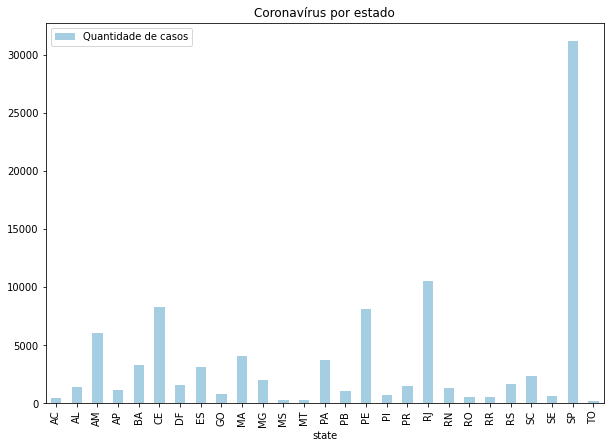

In [46]:
df_brasil_io_estados = df_brasil_io[['state', 'confirmed', 'deaths']].groupby(df_brasil_io['state'])
df_brasil_io_estados_total = df_brasil_io_estados.sum().reset_index()

# https://servicodados.ibge.gov.br/api/docs/malhas?versao=2
malhas_brasil = requests.get('https://servicodados.ibge.gov.br/api/v2/malhas/?resolucao=2&formato=application/vnd.geo+json').json()

# https://servicodados.ibge.gov.br/api/docs/localidades
ids_estados = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/estados').json()

malha_id = []
estados_id = []
codigos_estados = []
casos_estado = []

for feature in malhas_brasil['features']:
    malha_id.append( str(feature['properties']['codarea']) )
    
for state in ids_estados:
    estados_id.append( str(state['id']) )
    codigos_estados.append(state['sigla'])
    
# troca do nome de sigla para state, para merge com brasil.io
estados = pd.DataFrame( {'id': estados_id, 'state': codigos_estados} )

estados.set_index('id', inplace=True)
estados.sort_values(by=['state'])

for feature in malhas_brasil['features']:
    
    coordenadas = feature['properties']['centroide']
    latitude = coordenadas[1]
    longitude = coordenadas[0]
    
    cod = str(feature['properties']['codarea'])
    
    estados.loc[cod,'lat'] = latitude
    estados.loc[cod,'lng'] = longitude
    
estados.reset_index(inplace=True)

df_estados = pd.merge(left=df_brasil_io_estados_total, right=estados, left_on='state', right_on='state')
#df_estados

df_estados.plot(kind='bar',x='state',y='confirmed', label='Quantidade de casos', figsize=(10, 7), colormap='Paired', title='Coronavírus por estado')
plt.show()


In [47]:
brasil = folium.Map(
    location=[-16.1237611, -59.9219642],
    zoom_start=4
)

pontos = df_estados[['lat', 'lng', 'confirmed']].dropna().values
pontosArrays = np.split(pontos, len(pontos))

confirmados = df_estados['confirmed'].tolist()

confirmados = [np.log(x) for x in confirmados][:30]

for pontos, radius in zip(pontosArrays, confirmados):
    plugins.HeatMap(pontos,radius=radius, gradient={.4: 'red', .65: 'red', 1: 'red'}).add_to(brasil)
    
brasil

/home/fabio/miniconda2/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/fabio/miniconda2/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/fabio/miniconda2/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/fabio/miniconda2/lib/python3.7/site-packages/pandas/plotting/_tools.

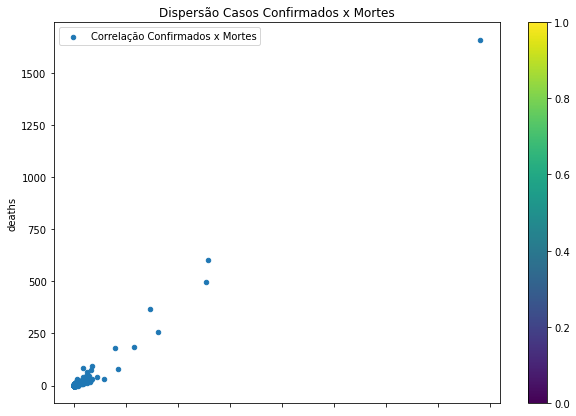

In [48]:
df_brasil_io_estados_populacao = df_brasil_io
df_brasil_io_estados_populacao.plot(kind='scatter',x='confirmed', y='deaths', label='Correlação Confirmados x Mortes', figsize=(10, 7), colormap='Paired', title='Dispersão Casos Confirmados x Mortes')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,782,789
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,745,747
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,30,35


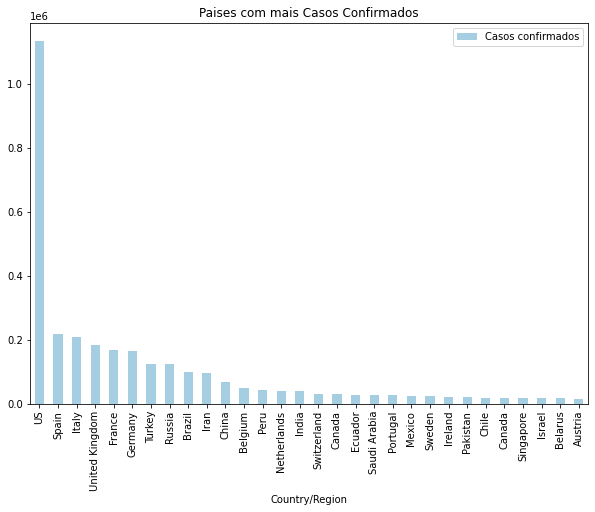

In [49]:
display(df_confirmados.head(5))

df_confirmados_mundo = df_confirmados.sort_values(by = df_confirmados.columns[-1], ascending = False)
colunas = list(df_confirmados_mundo.columns[1:2]) + list(df_confirmados_mundo.columns[-1:])
df_confirmados_mundo = df_confirmados_mundo[colunas]
df_confirmados_mundo.columns.values[-1] = "Casos confirmados"
df_confirmados_mundo.reset_index()
df_confirmados_mundo = df_confirmados_mundo.head(30)
df_confirmados_mundo.plot(kind='bar',x='Country/Region',y='Casos confirmados', figsize=(10, 7), colormap='Paired', title='Paises com mais Casos Confirmados')

In [50]:
df_confirmados_mundo_mapa = df_confirmados.sort_values(by = df_confirmados.columns[-1], ascending = False)
#colunas = list(df_confirmados_mundo_mapa.columns[1:2]) + list(df_confirmados_mundo_mapa.columns[2:3]) + list(df_confirmados_mundo_mapa.columns[3:4]) + list(df_confirmados_mundo_mapa.columns[-1:])
colunas =  list(df_confirmados_mundo_mapa.columns[2:3]) + list(df_confirmados_mundo_mapa.columns[3:4]) + list(df_confirmados_mundo_mapa.columns[-1:])
df_confirmados_mundo_mapa = df_confirmados_mundo_mapa[colunas]
df_confirmados_mundo_mapa.columns.values[-1] = "Casos confirmados"
df_confirmados_mundo_mapa.columns.values[-2] = "Long"
df_confirmados_mundo_mapa.columns.values[-3] = "Lat"
df_confirmados_mundo_mapa.reset_index()
#df_confirmados_mundo_mapa = df_confirmados_mundo.head_mapa(30)
#df_confirmados_mundo_mapa.plot(kind='bar',x='Country/Region',y='Casos confirmados', figsize=(10, 7), colormap='Paired', title='Paises com mais Casos Confirmados')
#print(df_confirmados_mundo_mapa)


mundo = folium.Map(
    location=[7.340773, -1.060596],    # Coordenadas retiradas do Google Maps
    zoom_start=2
)

    
pontos = df_confirmados_mundo_mapa[['Lat', 'Long', 'Casos confirmados']].dropna().values
pontosArrays = np.split(pontos, len(pontos))

confirmados = df_confirmados_mundo_mapa['Casos confirmados'].tolist()

# foi utilizado o logaritmo, pois EUA esta muito acima no momento
confirmados = [np.log(x) for x in confirmados][:100]

for ponto, radius in zip(pontosArrays, confirmados):
    plugins.HeatMap(ponto,radius=radius, gradient={.4: 'red', .65: 'red', 1: 'red'}).add_to(mundo)
    
mundo


/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,42,43,47,50,57,58,60,64,68,72
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,27,27,27,28,28,30,30,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,407,415,419,425,432,437,444,450,453,459
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,40,40,40,40,41,42,42,43,44
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


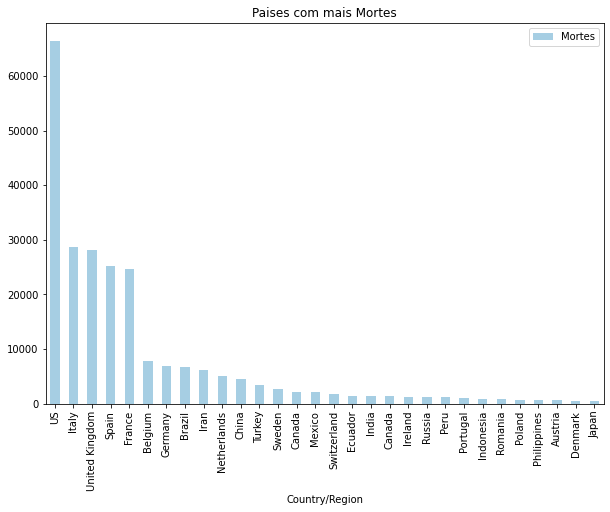

In [51]:
display(df_mortes.head(5))


df_mortes_mundo = df_mortes.sort_values(by = df_mortes.columns[-1], ascending = False)
colunas = list(df_mortes_mundo.columns[1:2]) + list(df_mortes_mundo.columns[-1:])
df_mortes_mundo = df_mortes_mundo[colunas]
df_mortes_mundo.columns.values[-1] = "Mortes"
df_mortes_mundo.reset_index()
df_mortes_mundo = df_mortes_mundo.head(30)
df_mortes_mundo.plot(kind='bar',x='Country/Region',y='Mortes', figsize=(10, 7), colormap='Paired', title='Paises com mais Mortes')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,179,188,188,207,220,228,252,260,310,331
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,385,394,403,410,422,431,455,470,488,519
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,333,344,344,344,385,398,423,468,468,472
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,7,7,11,11


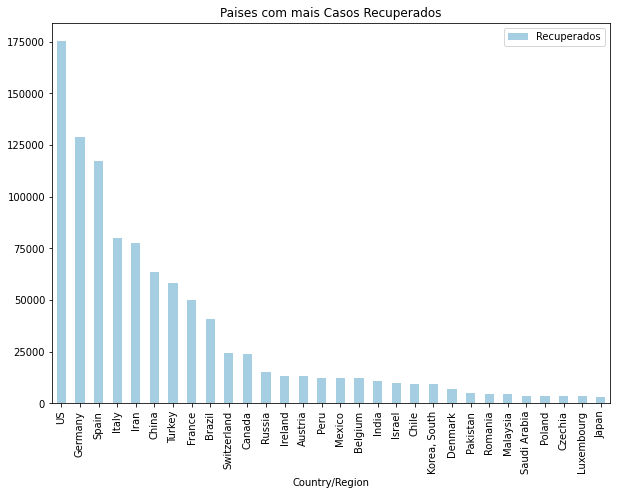

In [52]:
display(df_recuperados.head(5))

df_recuperados_mundo = df_recuperados.sort_values(by = df_recuperados.columns[-1], ascending = False)
colunas = list(df_recuperados_mundo.columns[1:2]) + list(df_recuperados_mundo.columns[-1:])
df_recuperados_mundo = df_recuperados_mundo[colunas]
df_recuperados_mundo.columns.values[-1] = "Recuperados"
df_recuperados_mundo.reset_index()
df_recuperados_mundo = df_recuperados_mundo.head(30)
df_recuperados_mundo.plot(kind='bar',x='Country/Region',y='Recuperados', figsize=(10, 7), colormap='Paired', title='Paises com mais Casos Recuperados')

In [53]:
df_confirmados_total = df_confirmados.groupby(["Country/Region"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
df_mortes_total = df_mortes.groupby(["Country/Region"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
df_recuperados_total = df_recuperados.groupby(["Country/Region"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]

In [54]:
print("Casos confirmados por país: ")
display(df_confirmados_total)

Casos confirmados por país: 


Country/Region
Afghanistan                  2469
Albania                       789
Algeria                      4295
Andorra                       747
Angola                         35
Antigua and Barbuda            25
Argentina                    4681
Armenia                      2273
Australia                    6799
Austria                     15558
Azerbaijan                   1894
Bahamas                        83
Bahrain                      3284
Bangladesh                   8790
Barbados                       81
Belarus                     15828
Belgium                     49517
Belize                         18
Benin                          90
Bhutan                          7
Bolivia                      1229
Bosnia and Herzegovina       1839
Botswana                       23
Brazil                      97100
Brunei                        138
Bulgaria                     1594
Burkina Faso                  652
Burma                         151
Burundi                        15

In [55]:
print("Mortes por país: ")
df_mortes_total

Mortes por país: 


Country/Region
Afghanistan                  72
Albania                      31
Algeria                     459
Andorra                      44
Angola                        2
Antigua and Barbuda           3
Argentina                   237
Armenia                      33
Australia                    94
Austria                     596
Azerbaijan                   25
Bahamas                      11
Bahrain                       8
Bangladesh                  175
Barbados                      7
Belarus                      97
Belgium                    7765
Belize                        2
Benin                         2
Bhutan                        0
Bolivia                      66
Bosnia and Herzegovina       72
Botswana                      1
Brazil                     6761
Brunei                        1
Bulgaria                     72
Burkina Faso                 44
Burma                         6
Burundi                       1
Cabo Verde                    2
                         

In [56]:
print("Recuperados por país: ")
df_recuperados_total

Recuperados por país: 


Country/Region
Afghanistan                  331
Albania                      519
Algeria                     1872
Andorra                      472
Angola                        11
Antigua and Barbuda           15
Argentina                   1320
Armenia                     1010
Australia                   5814
Austria                    13180
Azerbaijan                  1411
Bahamas                       24
Bahrain                     1568
Bangladesh                   177
Barbados                      44
Belarus                     3117
Belgium                    12211
Belize                        13
Benin                         42
Bhutan                         5
Bolivia                      134
Bosnia and Herzegovina       779
Botswana                       8
Brazil                     40937
Brunei                       126
Bulgaria                     287
Burkina Faso                 535
Burma                         37
Burundi                        7
Cabo Verde                  

In [57]:
def obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados):
    
    #for pais in pais:
    casos_confirmados = df_confirmados.set_index('Country/Region')
    casos_confirmados_grafico = casos_confirmados.loc[pais].drop(['Province/State','Lat','Long'])
    casos_confirmados_total = casos_confirmados_grafico[-1]
    #print(casos_confirmados_grafico[:-1][-1])
    #print(len(casos_confirmados_grafico))
    
    casos_mortes = df_mortes.set_index('Country/Region')
    casos_mortes_grafico = casos_mortes.loc[pais].drop(['Province/State','Lat','Long'])
    casos_mortes_total = casos_mortes_grafico[-1]

    
    casos_recuperados = df_recuperados.set_index('Country/Region')
    casos_recuperados_grafico = casos_recuperados.loc[pais].drop(['Province/State','Lat','Long'])
    casos_recuperados_total = casos_recuperados_grafico[-1]

    letalidade_pais_atual = (casos_mortes_total * 100) / casos_confirmados_total

    
    dias = len(casos_confirmados_grafico)
    letalidade_pais_grafico = []
    i = 0
    while i < dias:
        i = i + 1
        letalidade_pais_dia = (casos_mortes_grafico[:i][-1] * 100) / casos_confirmados_grafico[:i][-1]
        #print(casos_confirmados_grafico[:i][-1])
        letalidade_pais_grafico.append(letalidade_pais_dia)  

        
    #print(letalidade_pais_grafico)
    return casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico;


In [58]:
casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais('Brazil', df_confirmados, df_mortes, df_recuperados)

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


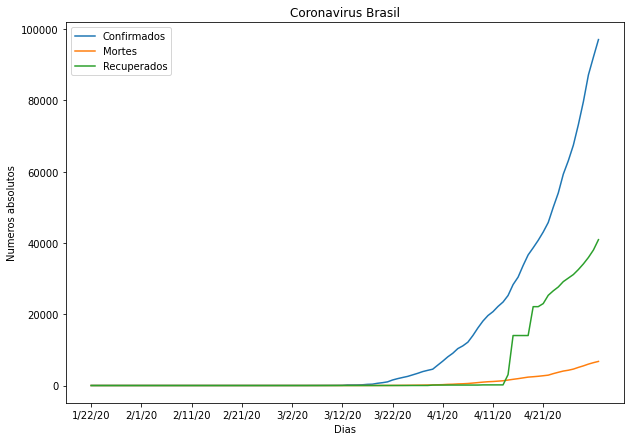

In [59]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))
plt.title('Coronavirus Brasil')
plt.xlabel('Dias')
#plt.xticks(range(0, 100, 10), fontsize=10, rotation=20)  
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

plt.plot(casos_confirmados_grafico, label = 'Confirmados')
plt.plot(casos_mortes_grafico, label = 'Mortes')
plt.plot(casos_recuperados_grafico, label = 'Recuperados')

#display(casos_confirmados_grafico)


plt.legend()

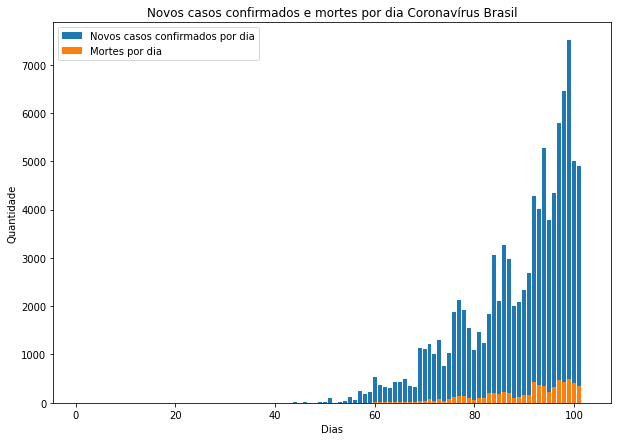

In [60]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico

#display(len(casos_confirmados_grafico))
#display(casos_confirmados_grafico[:50][-1])

plt.figure(figsize= (10,7))

#dias = len(casos_confirmados_grafico)
dias = []
casos_diarios = []
mortes_diarios = []
recuperados_diarios = []

i = 0
while i < len(casos_confirmados_grafico):
    i = i + 1
    #print(casos_confirmados_grafico[:i+1][-1])
    casos_diarios.append(casos_confirmados_grafico[:i+1][-1] - casos_confirmados_grafico[:i][-1])
    mortes_diarios.append(casos_mortes_grafico[:i+1][-1] - casos_mortes_grafico[:i][-1])
    recuperados_diarios.append(casos_recuperados_grafico[:i+1][-1] - casos_recuperados_grafico[:i][-1])
    dias.append(i)
    #print(casos_confirmados_grafico[:i][-1])


plt.title('Novos casos confirmados e mortes por dia Coronavírus Brasil')
plt.xlabel('Dias')
#plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Quantidade')
#plt.yscale('log')

plt.bar(dias,casos_diarios, label = 'Novos casos confirmados por dia')
plt.bar(dias,mortes_diarios, label = 'Mortes por dia')
#plt.bar(dias,recuperados_diarios, label = 'Recuperados por dia')
#plt.iplot(casos_mortes_grafico, label = 'Mortes')
#plt.iplot(casos_recuperados_grafico, label = 'Recuperados')


plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


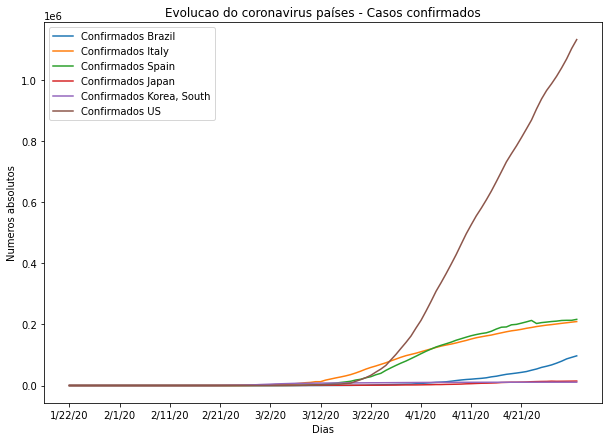

In [61]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))
plt.title('Evolucao do coronavirus países - Casos confirmados')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

paises = ['Brazil', 'Italy', 'Spain', 'Japan', 'Korea, South', 'US']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(casos_confirmados_grafico, label = 'Confirmados ' + pais)
    
plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


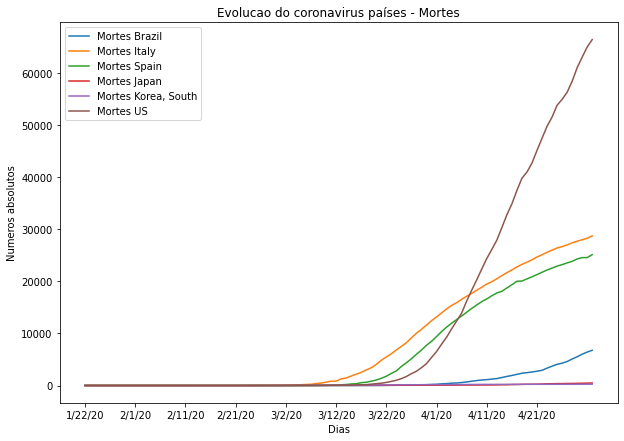

In [62]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))
plt.title('Evolucao do coronavirus países - Mortes')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

paises = ['Brazil', 'Italy', 'Spain', 'Japan', 'Korea, South', 'US']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(casos_mortes_grafico, label = 'Mortes ' + pais)
    
plt.legend()


/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


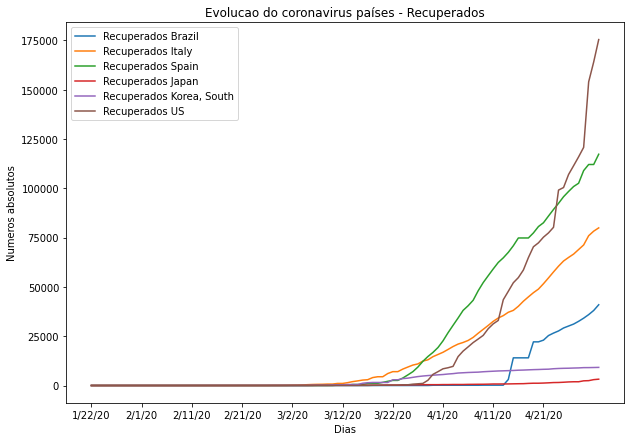

In [63]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))
plt.title('Evolucao do coronavirus países - Recuperados')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

paises = ['Brazil', 'Italy', 'Spain', 'Japan', 'Korea, South', 'US']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(casos_recuperados_grafico, label = 'Recuperados ' + pais)

    
plt.legend()

In [64]:
casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais('Brazil', df_confirmados, df_mortes, df_recuperados)

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


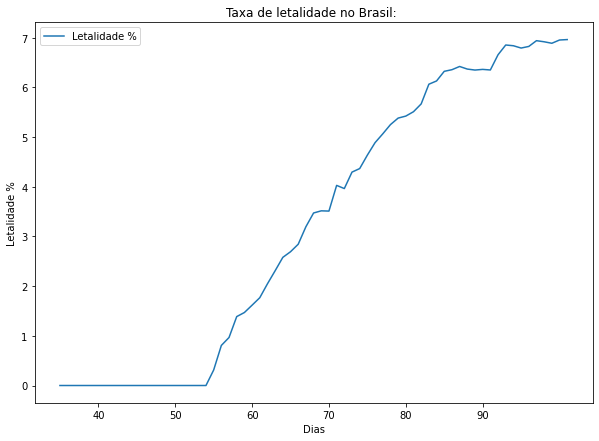

In [65]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))
plt.title('Taxa de letalidade no Brasil: ')
plt.xlabel('Dias')
#plt.xticks(range(0, 100, 10), fontsize=10, rotation=20)  
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Letalidade %')

plt.plot(letalidade_pais_grafico, label = 'Letalidade %')
plt.legend()


/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


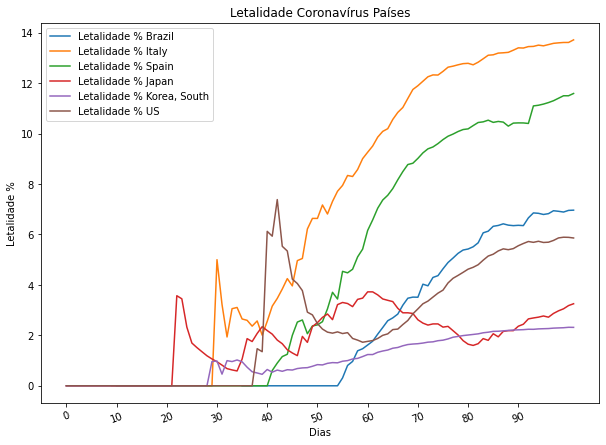

In [66]:
plt.figure(figsize= (10,7))
plt.title('Letalidade Coronavírus Países')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10, rotation=20)  
plt.ylabel('Letalidade %')

paises = ['Brazil', 'Italy', 'Spain', 'Japan', 'Korea, South', 'US']
#paises = ['Brazil']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(letalidade_pais_grafico, label = 'Letalidade % ' + pais)

    
plt.legend()

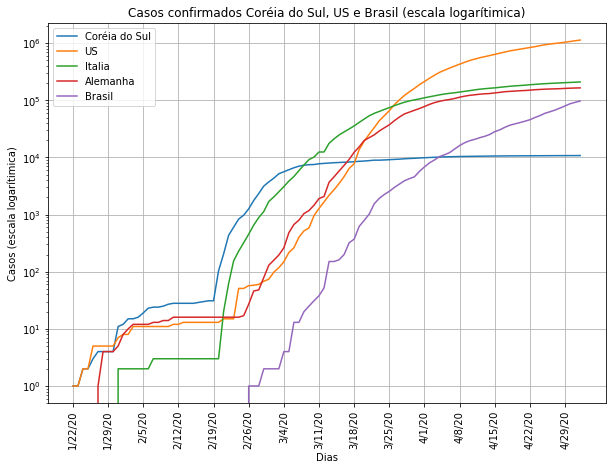

In [67]:
df_confirmados_brasil = df_confirmados.set_index('Country/Region')
df_confirmados_brasil_total = df_confirmados_brasil.loc["Brazil"].drop(['Province/State','Lat','Long'])


df_confirmados_coreiadosul = df_confirmados.set_index('Country/Region')
df_confirmados_coreiadosul_total = df_confirmados_coreiadosul.loc["Korea, South"].drop(['Province/State','Lat','Long'])

df_confirmados_us = df_confirmados.set_index('Country/Region')
df_confirmados_us_total = df_confirmados_us.loc["US"].drop(['Province/State','Lat','Long'])

df_confirmados_italia = df_confirmados.set_index('Country/Region')
df_confirmados_italia_total = df_confirmados_italia.loc["Italy"].drop(['Province/State','Lat','Long'])

df_confirmados_alemanha = df_confirmados.set_index('Country/Region')
df_confirmados_alemanha_total = df_confirmados_alemanha.loc["Germany"].drop(['Province/State','Lat','Long'])

plt.figure(figsize= (10,7))
plt.title('Casos confirmados Coréia do Sul, US e Brasil (escala logarítimica)')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 7), fontsize=10, rotation=90)  
plt.ylabel('Casos (escala logarítimica)')
plt.yscale('log')

plt.plot(df_confirmados_coreiadosul_total, label = 'Coréia do Sul')
plt.plot(df_confirmados_us_total, label = 'US')
plt.plot(df_confirmados_italia_total, label = 'Italia')
plt.plot(df_confirmados_alemanha_total, label = 'Alemanha')
plt.plot(df_confirmados_brasil_total, label = 'Brasil')

plt.grid(True)
plt.legend()

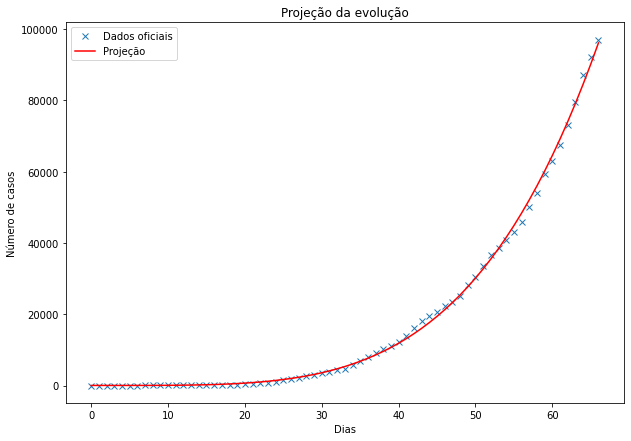

Função ajustada de acordo com os dados obtidos para o Brasil: 
Total de casos confirmados =  0.002381089751082031  * (dia) ^  4.180252608889934  +  20.882026559089464


In [68]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


# novas ocorrências por dia
df_confirmados_brasil = df_confirmados.set_index('Country/Region')
df_confirmados_brasil_total = df_confirmados_brasil.loc["Brazil"].drop(['Province/State','Lat','Long'])
df_confirmados_brasil_total_x = df_confirmados_brasil_total.values.tolist()
df_confirmados_brasil_total_x = list(filter(lambda num: num != 0, df_confirmados_brasil_total_x))
df_confirmados_brasil_total_x = array(df_confirmados_brasil_total_x)
df_confirmados_brasil_total_x.reshape(-1,1)


# número total de observações (em dias)
df_confirmados_brasil_total_y = list(range(len(df_confirmados_brasil_total_x)))
df_confirmados_brasil_total_y = array(df_confirmados_brasil_total_y)
df_confirmados_brasil_total_y.reshape(-1,1)


# https://stackoverflow.com/questions/10857948/use-of-curve-fit-to-fit-data
def func(x, a, b, c):
    return a*x**b + c


p0 = np.array([1,1,1])
coeffs, matcov = curve_fit(func, df_confirmados_brasil_total_y, df_confirmados_brasil_total_x, p0, maxfev=5000)

yaj = func(df_confirmados_brasil_total_y, coeffs[0], coeffs[1], coeffs[2])


plt.figure(figsize= (10,7))
plt.plot(df_confirmados_brasil_total_x, 'x', label='Dados oficiais')
plt.plot(yaj, 'r-', label='Projeção')


plt.title('Projeção da evolução')
plt.xlabel('Dias')
plt.ylabel('Número de casos')


plt.legend()
plt.show()


print("Função ajustada de acordo com os dados obtidos para o Brasil: ")
print("Total de casos confirmados = ", coeffs[0], " * (dia) ^ ", coeffs[1], " + ", coeffs[2])

# exemplo de calculo para o dia 32:
#print(func(32, coeffs[0], coeffs[1], coeffs[2]))

,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00,2020-05-10 00:00:00,2020-05-11 00:00:00,2020-05-12 00:00:00,...,2020-06-29 00:00:00,2020-06-30 00:00:00,2020-07-01 00:00:00,2020-07-02 00:00:00,2020-07-03 00:00:00,2020-07-04 00:00:00,2020-07-05 00:00:00,2020-07-06 00:00:00,2020-07-07 00:00:00,2020-07-08 00:00:00
Projetados,1,1,1,2,2,2,2,4,4,13,...,50036,54043,59324,63100,67446,73235,79685,87187,92202,97100


,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00,2020-05-10 00:00:00,2020-05-11 00:00:00,2020-05-12 00:00:00
Projeção 10 dias,102404,108945,115800,122977,130489,138344,146554,155130,164082,173422


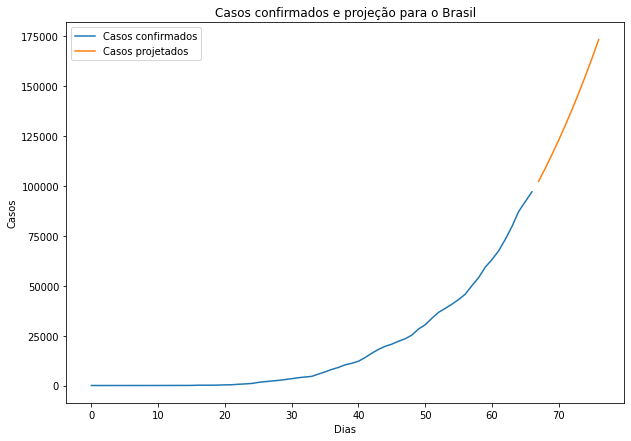

In [69]:
# quantidade de casos estimados por dia
# display(df_confirmados_brasil_total_x)
# novos_casos_por_dia = func(dia, coeffs[0], coeffs[1], coeffs[2])

# 10 dias a partir do ultimo dia analisado
# display(len(df_confirmados_brasil_total_y))
dias_subsequentes = [len(df_confirmados_brasil_total_y) + x for x in range(10)]

# funcao que calcula novos casos para dia
# argumentos: dias_a_projetar, funcao_projecao, parametros a, b, c encontrados utilizando dados anteriores
def projecao(dias_a_projetar, funcao_projecao, a, b, c):
    casos_estimados_por_dia = []
    for i in dias_a_projetar:
        casos_estimados_por_dia.append(funcao_projecao(i, a, b, c))        
    return casos_estimados_por_dia


fig = plt.figure(figsize= (10,7))

projetados = projecao(dias_subsequentes, func, coeffs[0], coeffs[1], coeffs[2])

projetados_df = []
projetados_tabela = [ '%.0f' % elem for elem in df_confirmados_brasil_total_x ]
projetados_df.append(projetados_tabela)

tabela_projetados = pd.DataFrame(projetados_df)
tabela_projetados.index = ["Projetados"]
datelist = pd.date_range(datetime.today().strftime('%Y-%m-%d'), periods=len(projetados_tabela)).tolist()
tabela_projetados.columns = datelist
display(tabela_projetados)

cmd = sns.light_palette('green', as_cmap=True)

s = tabela_projetados.style.background_gradient(cmap=cmd, low=0, high=1, axis=0)
s

projecao_df = []
projecao_tabela = [ '%.0f' % elem for elem in projetados ]
projecao_df.append(projecao_tabela)

tabela_projecao = pd.DataFrame(projecao_df)
tabela_projecao.index = ["Projeção 10 dias"]
datelist = pd.date_range(datetime.today().strftime('%Y-%m-%d'), periods=10).tolist()
tabela_projecao.columns = datelist
display(tabela_projecao)

cmd = sns.light_palette('green', as_cmap=True)

s = tabela_projecao.style.background_gradient(cmap=cmd, low=0, high=1, axis=0)
s


plt.title('Casos confirmados e projeção para o Brasil')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Casos')

plt.plot(df_confirmados_brasil_total_x, label = 'Casos confirmados')
plt.plot(dias_subsequentes, projetados, label = 'Casos projetados')
plt.legend()

Função casos confirmados =  1.6584923916397909e-09  * (dia) *  6.871019370902674  +  -321.54450428111
Função mortes            =  1.8536397222658183e-12  * (dia) *  7.770679872962093  +  -29.628130140693276


,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00,2020-05-10 00:00:00,2020-05-11 00:00:00,2020-05-12 00:00:00
Confirmados,104595,111869,119570,127718,136335,145442,155063,165221,175942,187250
Mortes,7490,8083,8715,9390,10110,10878,11695,12566,13492,14477


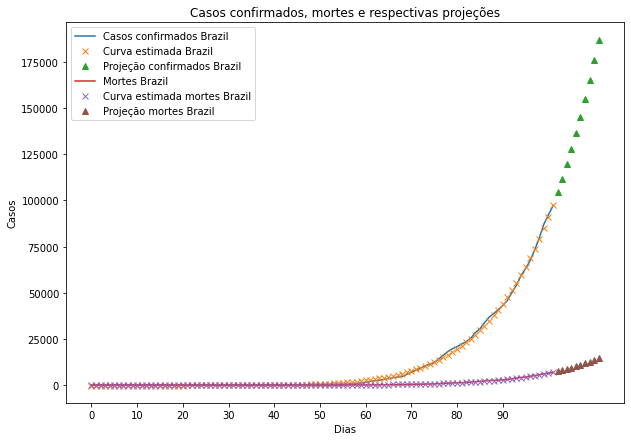

In [70]:
def obter_projecao_pais(pais, df_confirmados, df_mortes, df_recuperados):


    # novas ocorrências por dia
    df_confirmados_pais = df_confirmados.set_index('Country/Region')
    df_confirmados_pais_total = df_confirmados_pais.loc[pais].drop(['Province/State','Lat','Long'])
    df_confirmados_pais_total_x = df_confirmados_pais_total.values.tolist()
    #df_confirmados_pais_total_x = list(filter(lambda num: num != 0, df_confirmados_pais_total_x))
    df_confirmados_pais_total_x = array(df_confirmados_pais_total_x)
    df_confirmados_pais_total_x.reshape(-1,1)
    
    # mortes
    df_mortes_pais = df_mortes.set_index('Country/Region')
    df_mortes_pais_total = df_mortes_pais.loc[pais].drop(['Province/State','Lat','Long'])
    df_mortes_pais_total_x = df_mortes_pais_total.values.tolist()
    #df_mortes_pais_total_x = list(filter(lambda num: num != 0, df_mortes_pais_total_x))
    df_mortes_pais_total_x = array(df_mortes_pais_total_x)
    df_mortes_pais_total_x.reshape(-1,1)
    
    


    # número total de observações (em dias)
    df_confirmados_pais_total_y = list(range(len(df_confirmados_pais_total_x)))
    df_confirmados_pais_total_y = array(df_confirmados_pais_total_y)
    df_confirmados_pais_total_y.reshape(-1,1)

    
    # número total de observações (em dias)
    df_mortes_pais_total_y = list(range(len(df_mortes_pais_total_x)))
    df_mortes_pais_total_y = array(df_mortes_pais_total_y)
    df_mortes_pais_total_y.reshape(-1,1)
    
    
    # https://stackoverflow.com/questions/10857948/use-of-curve-fit-to-fit-data
    def func(x, a, b, c):
        return a*x**b + c
    
    p0 = np.array([1,1,1])
    
    # confirmados
    coeffs, matcov = curve_fit(func, df_confirmados_pais_total_y, df_confirmados_pais_total_x, p0, maxfev=5000)
    yaj = func(df_confirmados_pais_total_y, coeffs[0], coeffs[1], coeffs[2])

    # confirmados
    coeffs_mortes, matcov_mortes = curve_fit(func, df_mortes_pais_total_y, df_mortes_pais_total_x, p0, maxfev=5000)
    yaj_mortes = func(df_mortes_pais_total_y, coeffs_mortes[0], coeffs_mortes[1], coeffs_mortes[2])

    
    # 10 dias a partir do ultimo dia analisado
    # display(len(df_confirmados_brasil_total_y))
    dias_subsequentes = [len(df_confirmados_pais_total_y) + x for x in range(10)]

    def projecao(dias_a_projetar, funcao_projecao, a, b, c):
        casos_estimados_por_dia = []
        for i in dias_a_projetar:
            casos_estimados_por_dia.append(funcao_projecao(i, a, b, c))        
        return casos_estimados_por_dia
    
    projetados_confirmados = projecao(dias_subsequentes, func, coeffs[0], coeffs[1], coeffs[2])
    projetados_mortes = projecao(dias_subsequentes, func, coeffs_mortes[0], coeffs_mortes[1], coeffs_mortes[2])

    
    
    # retorno:
    return df_confirmados_pais_total_x, yaj, coeffs[0], coeffs[1], coeffs[2], projetados_confirmados, df_mortes_pais_total_x, yaj_mortes, coeffs_mortes[0], coeffs_mortes[1], coeffs_mortes[2], projetados_mortes, dias_subsequentes




#curva_confirmados, curva_confirmados_calculada, a, b, c, curva_confirmados_projetados, curva_mortes, curva_mortes_calculada, d, e, f, curva_mortes_projetados, dias_projetados = obter_projecao_pais('Italy', df_confirmados, df_mortes, df_recuperados)

fig = plt.figure(figsize= (10,7))

plt.title('Casos confirmados, mortes e respectivas projeções')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Casos')


paises = ['Brazil']

for pais in paises:
    curva_confirmados, curva_confirmados_calculada, a, b, c, curva_confirmados_projetados, curva_mortes, curva_mortes_calculada, d, e, f, curva_mortes_projetados, dias_projetados = obter_projecao_pais(pais, df_confirmados, df_mortes, df_recuperados)

    plt.plot(curva_confirmados, '-', label='Casos confirmados ' + pais)
    plt.plot(curva_confirmados_calculada, 'x', label='Curva estimada ' + pais)
    plt.plot(dias_projetados, curva_confirmados_projetados, '^', label = 'Projeção confirmados ' + pais)

    plt.plot(curva_mortes, '-', label='Mortes ' + pais)
    plt.plot(curva_mortes_calculada, 'x', label='Curva estimada mortes ' + pais)
    plt.plot(dias_projetados, curva_mortes_projetados, '^', label = 'Projeção mortes ' + pais)

    print("Função casos confirmados = ", a, " * (dia) * ", b, " + ", c)
    print("Função mortes            = ", d, " * (dia) * ", e, " + ", f)
    
plt.legend()
    
    
#display(curva_mortes_projetados)    
a = []
curva_confirmados_projetados = [ '%.0f' % elem for elem in curva_confirmados_projetados ]
curva_mortes_projetados = [ '%.0f' % elem for elem in curva_mortes_projetados ]
a.append(curva_confirmados_projetados)
a.append(curva_mortes_projetados)

df = pd.DataFrame(a)

df.index = ["Confirmados", "Mortes"]
datelist = pd.date_range(datetime.today().strftime('%Y-%m-%d'), periods=10).tolist()
df.columns = datelist



cm = sns.light_palette('green', as_cmap=True)

s = df.style.background_gradient(cmap=cm, low=0, high=1, axis=0)
s

In [71]:
casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais('Germany', df_confirmados, df_mortes, df_recuperados)

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


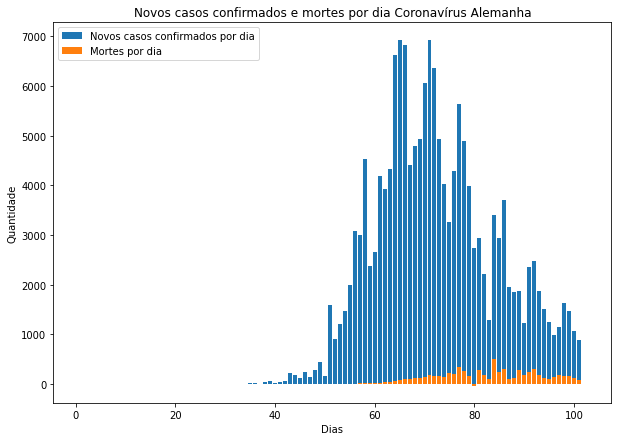

In [72]:
# Dados já recuperados para a Alemanha:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))


dias = []
casos_diarios = []
mortes_diarios = []
recuperados_diarios = []

i = 0
while i < len(casos_confirmados_grafico):
    i = i + 1
    casos_diarios.append(casos_confirmados_grafico[:i+1][-1] - casos_confirmados_grafico[:i][-1])
    mortes_diarios.append(casos_mortes_grafico[:i+1][-1] - casos_mortes_grafico[:i][-1])
    recuperados_diarios.append(casos_recuperados_grafico[:i+1][-1] - casos_recuperados_grafico[:i][-1])
    dias.append(i)


plt.title('Novos casos confirmados e mortes por dia Coronavírus Alemanha')
plt.xlabel('Dias')
plt.ylabel('Quantidade')

plt.bar(dias,casos_diarios, label = 'Novos casos confirmados por dia')
plt.bar(dias,mortes_diarios, label = 'Mortes por dia')

plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in power


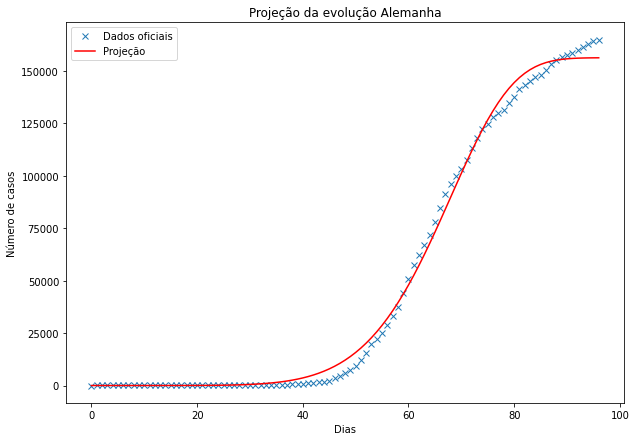

Função ajustada de acordo com os dados obtidos para a Alemanha: 
Total de casos confirmados =  156299.60425838802  - e * ( -  3.144401730562658e-13  * dia) ^  6.785752283743022


In [73]:
# Dados já recuperados para a Alemanha:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


# novas ocorrências por dia
df_confirmados_alemanha = df_confirmados.set_index('Country/Region')
df_confirmados_alemanha_total = df_confirmados_alemanha.loc["Germany"].drop(['Province/State','Lat','Long'])
df_confirmados_alemanha_total_x = df_confirmados_alemanha_total.values.tolist()
df_confirmados_alemanha_total_x = list(filter(lambda num: num != 0, df_confirmados_alemanha_total_x))
df_confirmados_alemanha_total_x = array(df_confirmados_alemanha_total_x)
df_confirmados_alemanha_total_x.reshape(-1,1)


# número total de observações (em dias)
df_confirmados_alemanha_total_y = list(range(len(df_confirmados_alemanha_total_x)))
df_confirmados_alemanha_total_y = array(df_confirmados_alemanha_total_y)
df_confirmados_alemanha_total_y.reshape(-1,1)


# https://www.youtube.com/watch?v=Ewp5CF5ba_w
def func(x, a, b, c):
    result = a*(1-np.exp(-b*x**c))
    return result

p0 = np.array([1,1,1])
coeffs, matcov = curve_fit(func, df_confirmados_alemanha_total_y, df_confirmados_alemanha_total_x, p0, maxfev=5000)

yaj = func(df_confirmados_alemanha_total_y, coeffs[0], coeffs[1], coeffs[2])


plt.figure(figsize= (10,7))
plt.plot(df_confirmados_alemanha_total_x, 'x', label='Dados oficiais')
plt.plot(yaj, 'r-', label='Projeção')



plt.title('Projeção da evolução Alemanha')
plt.xlabel('Dias')
#plt.xticks(range(0, 100, 10), fontsize=10, rotation=20)  
plt.ylabel('Número de casos')


plt.legend()
plt.show()


print("Função ajustada de acordo com os dados obtidos para a Alemanha: ")
print("Total de casos confirmados = ", coeffs[0], " - e * ( - ", coeffs[1], " * dia) ^ ", coeffs[2])

